In [20]:
### Imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
import seaborn as sns

In [21]:
### Load the Datasets
df2016 = pd.read_csv('https://raw.githubusercontent.com/Frans-Grau/Datasets/main/P5%20-%20Datasets/df2016.csv')
df2017 = pd.read_csv('https://raw.githubusercontent.com/Frans-Grau/Datasets/main/P5%20-%20Datasets/df2017.csv')
df2018 = pd.read_csv('https://raw.githubusercontent.com/Frans-Grau/Datasets/main/P5%20-%20Datasets/df2018.csv')

### Quick preprocessing
df_all = pd.concat([df2016,df2017,df2018], ignore_index = True, axis = 0)
df_all.drop(['Unnamed: 0','CANCELLED','DIVERTED'], axis=1, inplace= True)
df_all.dropna(inplace=True)
df_all['FL_DATE'] = pd.to_datetime(df_all['FL_DATE'])

### New column OP-Carrier code to full Airline Name
df_all['AIRLINE'] = df_all['OP_CARRIER'].apply(lambda x: 'Delta Airlines' if x == 'DL' else 'Southwest Airlines' if x=='WN' else 'American Airlines' if x=='AA' 
else 'JetBlue Airways' if x=='B6' else 'SkyWest Airlines' if x=='OO' else 'Atlantic Southeast Airlines' if x == 'EV' else 'United Airlines' if x == 'UA' 
else 'Pinnacle Airlines' if x == '9E' else 'Spirit Airlines' if x== 'NK' else 'Alaska Airlines' if x == 'AS' else 'Virgin America' if x == 'VX' else 'Frontier' if x =='F9' 
else 'Republic Airlines' if x == 'YX'else 'Hawaiian Airlines' if x == 'HA' else 'Envoy Air' if x == 'MQ' else 'Air Shuttle' if x == 'YV' else 'Allegiant Air' if x=='G4' 
else 'Comair')

df_all.head()

,FL_DATE,OP_CARRIER,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,CRS_ARR_TIME,ARR_TIME,AIR_TIME,DISTANCE,AIRLINE
0,2016-01-01,DL,ATL,GRR,2125,2130.0,5.0,2321,2319.0,92.0,640.0,Delta Airlines
1,2016-01-01,DL,LAX,ATL,2255,2256.0,1.0,600,547.0,207.0,1947.0,Delta Airlines
2,2016-01-01,DL,ATL,BNA,1233,1356.0,83.0,1239,1402.0,38.0,214.0,Delta Airlines
3,2016-01-01,DL,ATL,JAX,945,946.0,1.0,1050,1053.0,45.0,270.0,Delta Airlines
4,2016-01-01,DL,ATL,OKC,2110,2107.0,-3.0,2236,2224.0,116.0,761.0,Delta Airlines


In [22]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2080873 entries, 0 to 2109730
Data columns (total 12 columns):
 #   Column        Dtype         
---  ------        -----         
 0   FL_DATE       datetime64[ns]
 1   OP_CARRIER    object        
 2   ORIGIN        object        
 3   DEST          object        
 4   CRS_DEP_TIME  int64         
 5   DEP_TIME      float64       
 6   DEP_DELAY     float64       
 7   CRS_ARR_TIME  int64         
 8   ARR_TIME      float64       
 9   AIR_TIME      float64       
 10  DISTANCE      float64       
 11  AIRLINE       object        
dtypes: datetime64[ns](1), float64(5), int64(2), object(4)
memory usage: 206.4+ MB


In [23]:
### Check that the data 
df_all[df_all['FL_DATE']=='2017-01-12']['ORIGIN'].value_counts()

ATL    1056
LAX     575
JFK     256
Name: ORIGIN, dtype: int64

<AxesSubplot:xlabel='ORIGIN', ylabel='DEP_DELAY'>

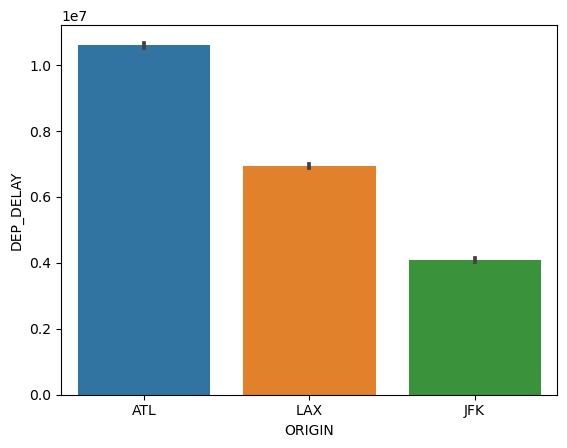

In [24]:
sns.barplot(data = df_all, x = 'ORIGIN', y='DEP_DELAY',estimator='sum')

<AxesSubplot:>

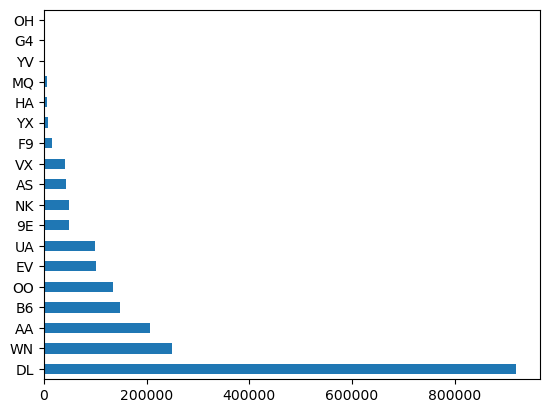

In [25]:
df_all['OP_CARRIER'].value_counts().plot(kind='barh')

<AxesSubplot:>

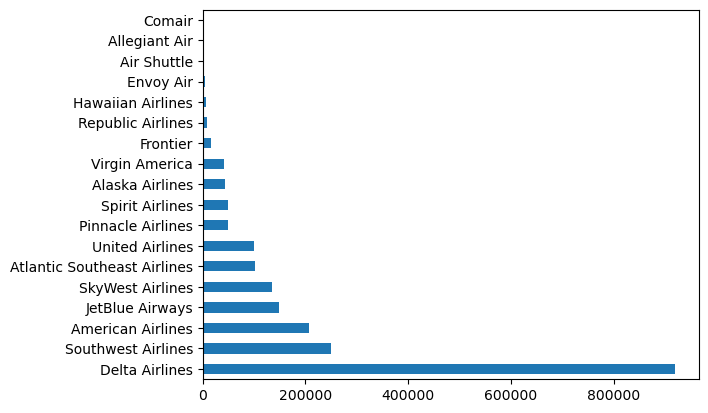

In [26]:
df_all['AIRLINE'].value_counts().plot(kind='barh')

<AxesSubplot:ylabel='AIRLINE'>

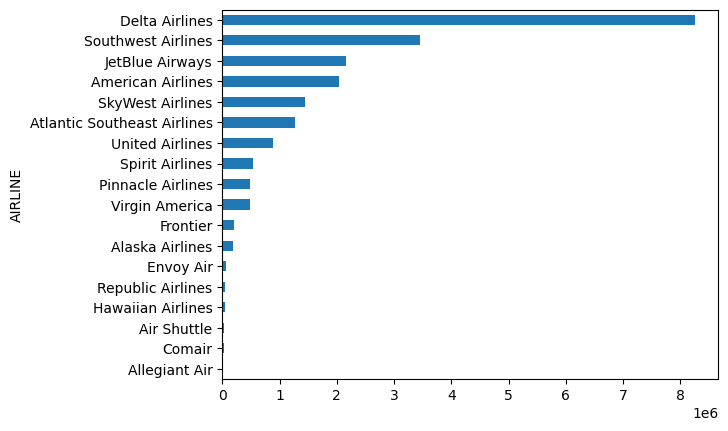

In [27]:
df_all.groupby('AIRLINE')['DEP_DELAY'].sum().sort_values().plot(kind='barh')

<AxesSubplot:ylabel='AIRLINE'>

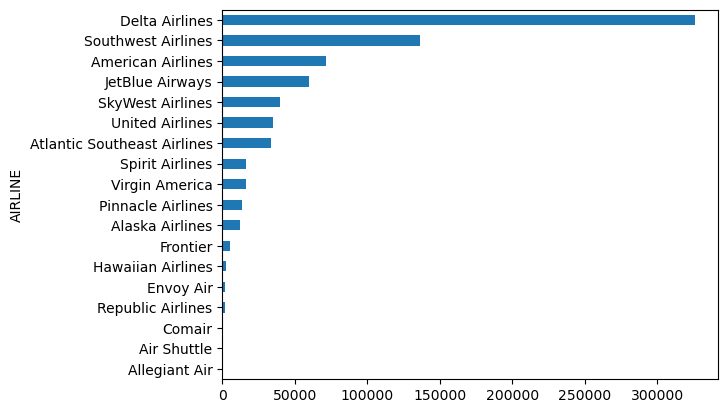

In [28]:
### Delay count
condition = df_all[df_all['DEP_DELAY']>0]
condition.groupby('AIRLINE')['DEP_DELAY'].count().sort_values().plot(kind='barh')

<AxesSubplot:ylabel='AIRLINE'>

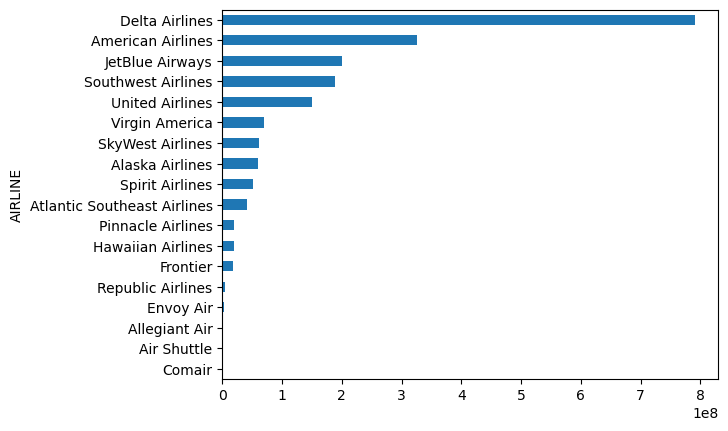

In [29]:
df_all.groupby('AIRLINE')['DISTANCE'].sum().sort_values().plot(kind='barh')

<AxesSubplot:ylabel='AIRLINE'>

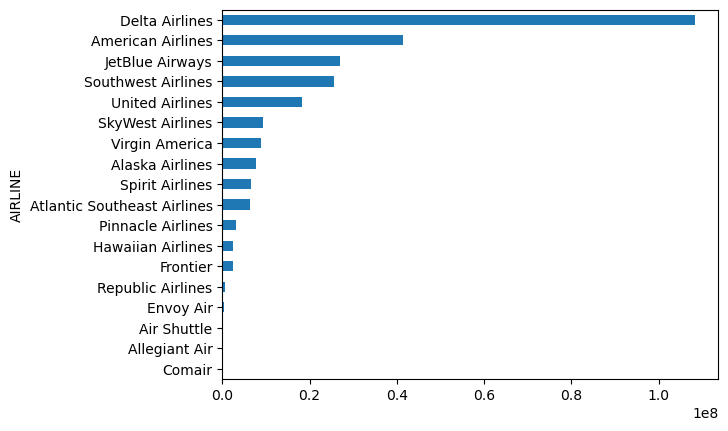

In [30]:
df_all.groupby('AIRLINE')['AIR_TIME'].sum().sort_values().plot(kind='barh')

In [31]:
df_airport_ATL_p02 = df_all.pivot_table(values = 'DEP_DELAY', index = ['ORIGIN', 'DEST','AIRLINE'], aggfunc = 'sum').sort_values(by = 'DEP_DELAY', ascending = False)
df_airport_ATL_p02

DEP_DELAY
ORIGIN DEST AIRLINE                      
ATL    EWR  Delta Airlines       236562.0
       LGA  Delta Airlines       233796.0
LAX    SFO  Southwest Airlines   212361.0
       OAK  Southwest Airlines   181341.0
       JFK  Delta Airlines       165150.0
...                                   ...
       PHL  Virgin America         -174.0
JFK    SNA  Delta Airlines         -218.0
       SJC  Delta Airlines         -287.0
ATL    PDX  Alaska Airlines        -294.0
LAX    AUS  United Airlines        -590.0

[995 rows x 1 columns]

In [32]:
df_airport_ATL_p= df_all.pivot_table(values = 'DEP_DELAY', index = ['ORIGIN', 'DEST'], aggfunc = 'sum').sort_values(by = 'DEP_DELAY', ascending = False)
df_airport_ATL_p

DEP_DELAY
ORIGIN DEST           
LAX    SFO    784071.0
       JFK    506009.0
ATL    EWR    360408.0
       LGA    360265.0
JFK    LAX    348187.0
...                ...
LAX    FSD       -23.0
       DSM       -33.0
       LIT       -75.0
       CID      -122.0
JFK    SNA      -218.0

[347 rows x 1 columns]

### Time Series - DEMO

In [33]:
### Imports
import itertools
import statsmodels.api as sm
from pylab import rcParams


In [34]:
### Group the delay minutes by date
df_delay = df_all.groupby('FL_DATE')['DEP_DELAY'].mean().reset_index()
df_delay = df_delay.sort_values('FL_DATE')
df_delay['Month'] = pd.DatetimeIndex(df_delay['FL_DATE']).month
df_delay = df_delay.sort_values('FL_DATE').set_index('FL_DATE')
df_delay

,DEP_DELAY,Month
FL_DATE,,
2016-01-01,6.106262,1
2016-01-02,9.728279,1
2016-01-03,15.104025,1
2016-01-04,10.579281,1
2016-01-05,12.293303,1
...,...,...
2018-12-27,20.029929,12
2018-12-28,32.150881,12
2018-12-29,15.529323,12


In [35]:
### Groupby Month
df = df_delay.groupby('Month')['DEP_DELAY'].mean().reset_index()
df

,Month,DEP_DELAY
0,1,12.280036
1,2,8.475598
2,3,9.372123
3,4,11.790340
4,5,10.667984
5,6,14.556482
6,7,15.082629
7,8,13.330550
8,9,5.767498
9,10,6.131386


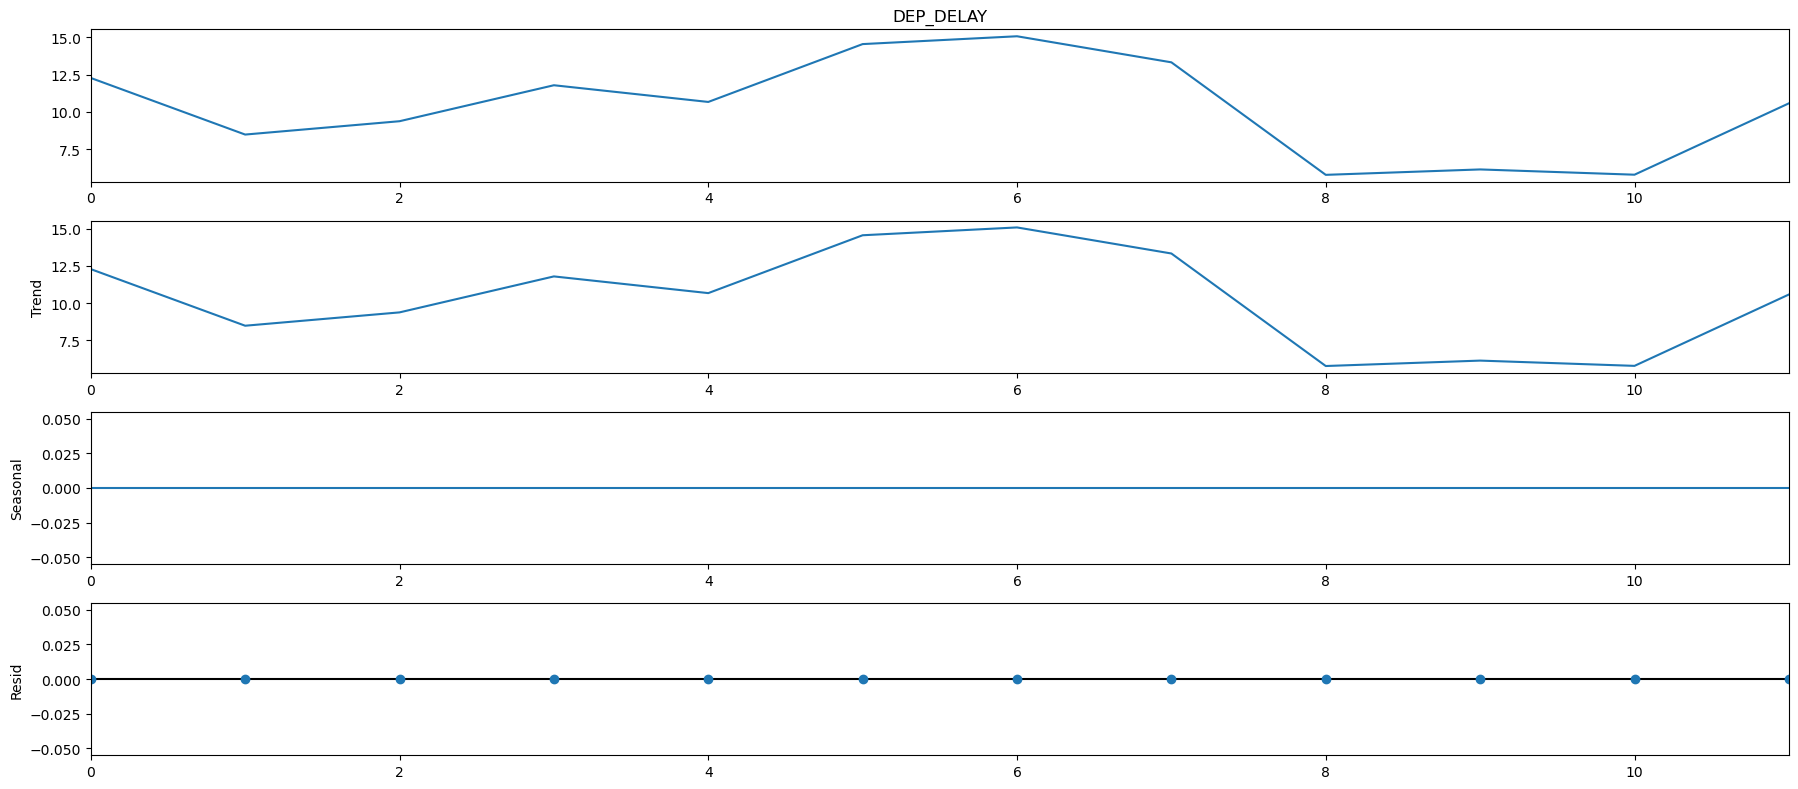

In [36]:
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(x = df['DEP_DELAY'], period=1, model='additive')
fig = decomposition.plot()
plt.show()

In [37]:
### Rolling window
df_delay['Rolling'] = df_delay['DEP_DELAY'].rolling(7, min_periods=2).mean()
df_delay[['DEP_DELAY', 'Rolling']]

,DEP_DELAY,Rolling
FL_DATE,,
2016-01-01,6.106262,NaN
2016-01-02,9.728279,7.917270
2016-01-03,15.104025,10.312855
2016-01-04,10.579281,10.379462
2016-01-05,12.293303,10.762230
...,...,...
2018-12-27,20.029929,11.198997
2018-12-28,32.150881,12.322148
2018-12-29,15.529323,12.906183


<AxesSubplot:xlabel='FL_DATE'>

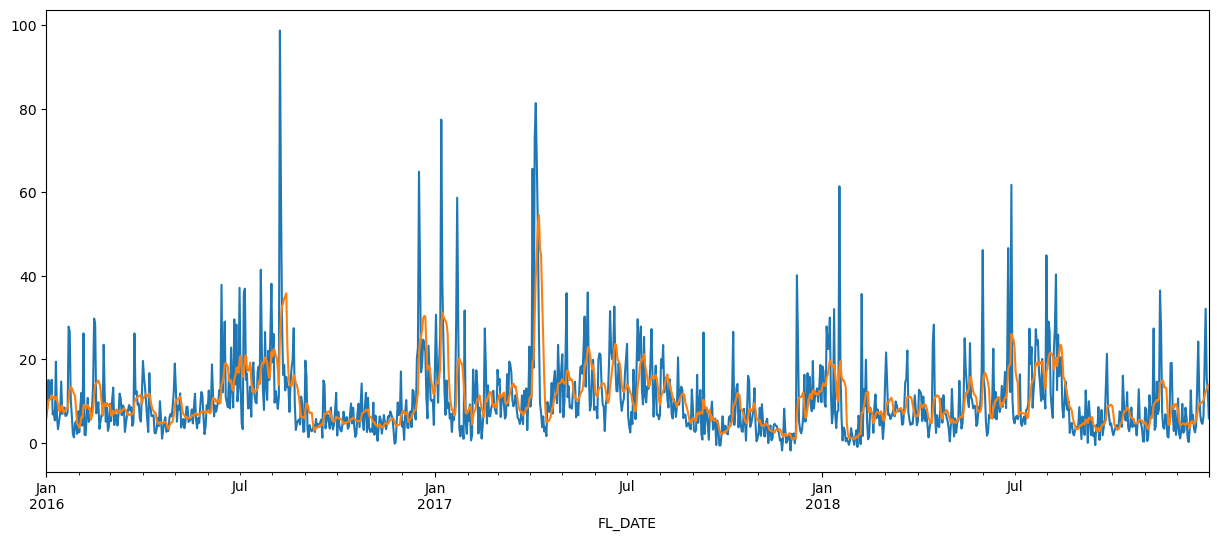

In [38]:
df_delay['DEP_DELAY'].plot(figsize=(15, 6))
df_delay['Rolling'].plot(figsize=(15, 6))

<AxesSubplot:xlabel='FL_DATE'>

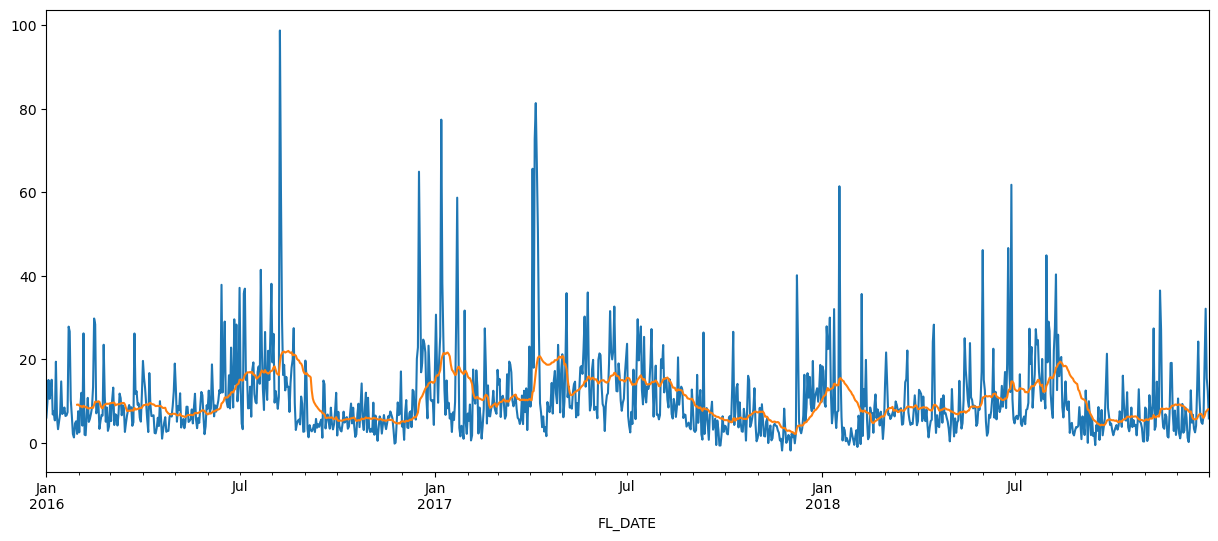

In [39]:
df_delay['DEP_DELAY'].plot(figsize=(15, 6))
df_delay['DEP_DELAY'].rolling(30).mean().plot(figsize=(15, 6))

<AxesSubplot:xlabel='FL_DATE'>

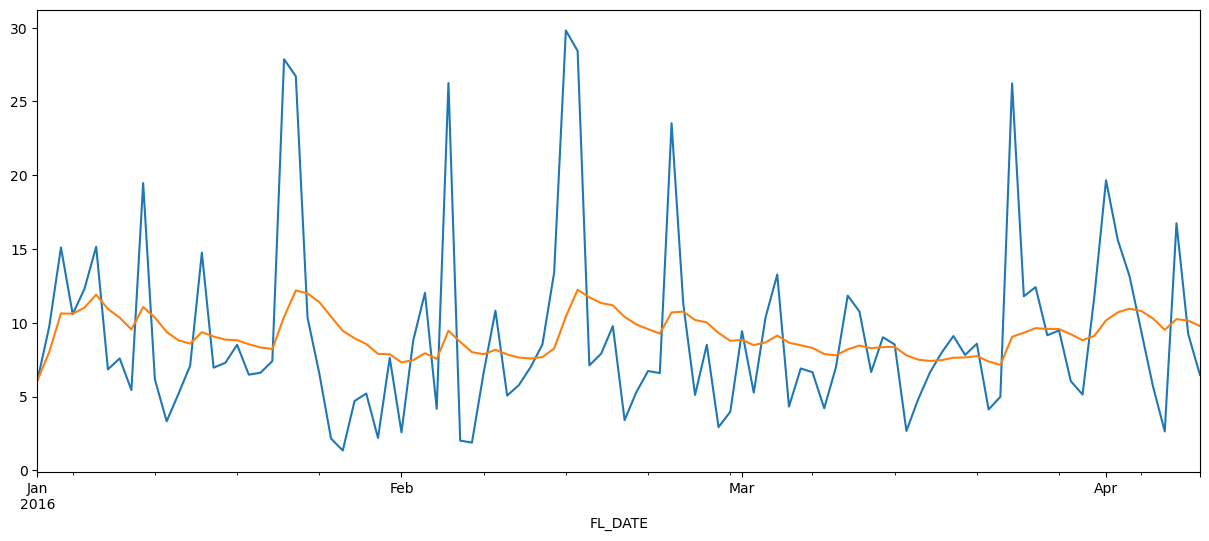

In [40]:
### EXPONENTIAL SMOOTHING
df_delay['DEP_DELAY'].iloc[:100].plot(figsize=(15, 6))
df_delay['DEP_DELAY'].iloc[:100].ewm(alpha=0.1).mean().plot(figsize=(15, 6))

ValueError: shape mismatch: objects cannot be broadcast to a single shape

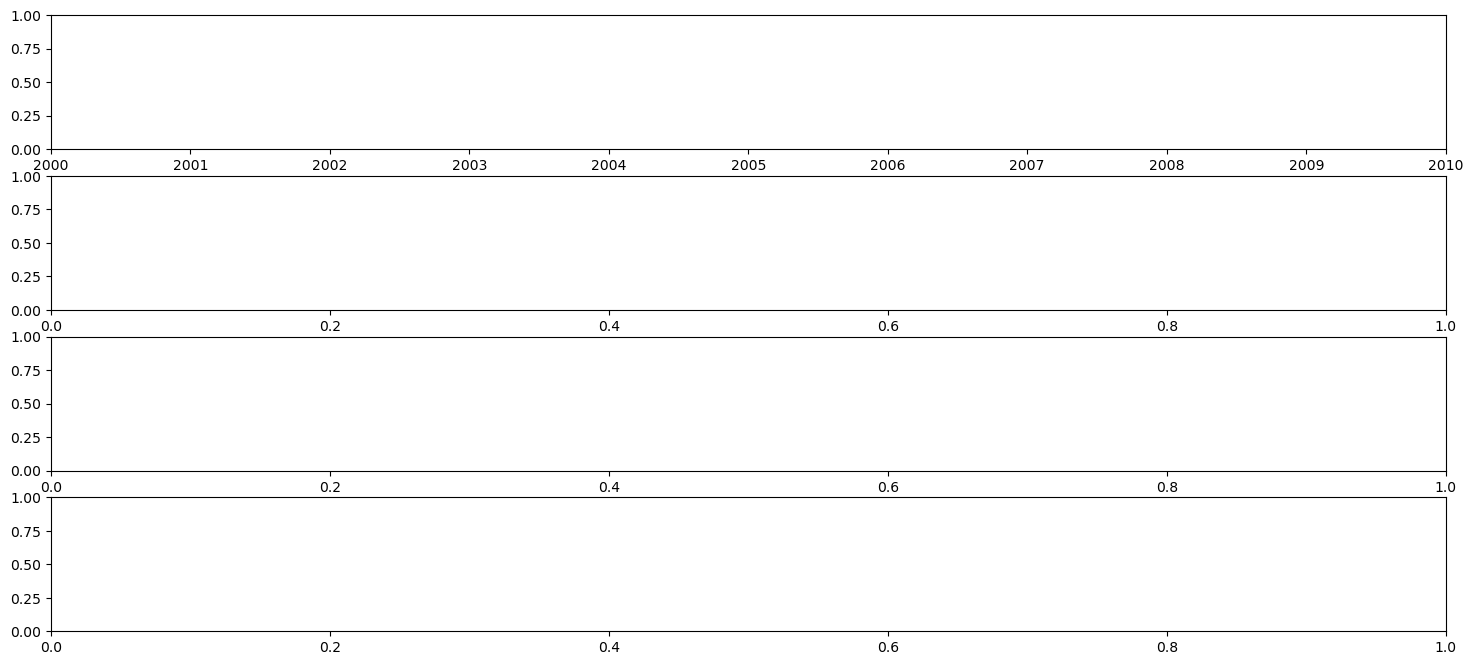

In [41]:
### SEASONAL STUDY
rcParams['figure.figsize'] = 18, 8
sig = df_delay.groupby('FL_DATE')['DEP_DELAY'].resample('M').mean()
decomposition = sm.tsa.seasonal_decompose(x = sig.rolling(7).mean().iloc[7:], period=30, model='additive')
fig = decomposition.plot()
plt.show()

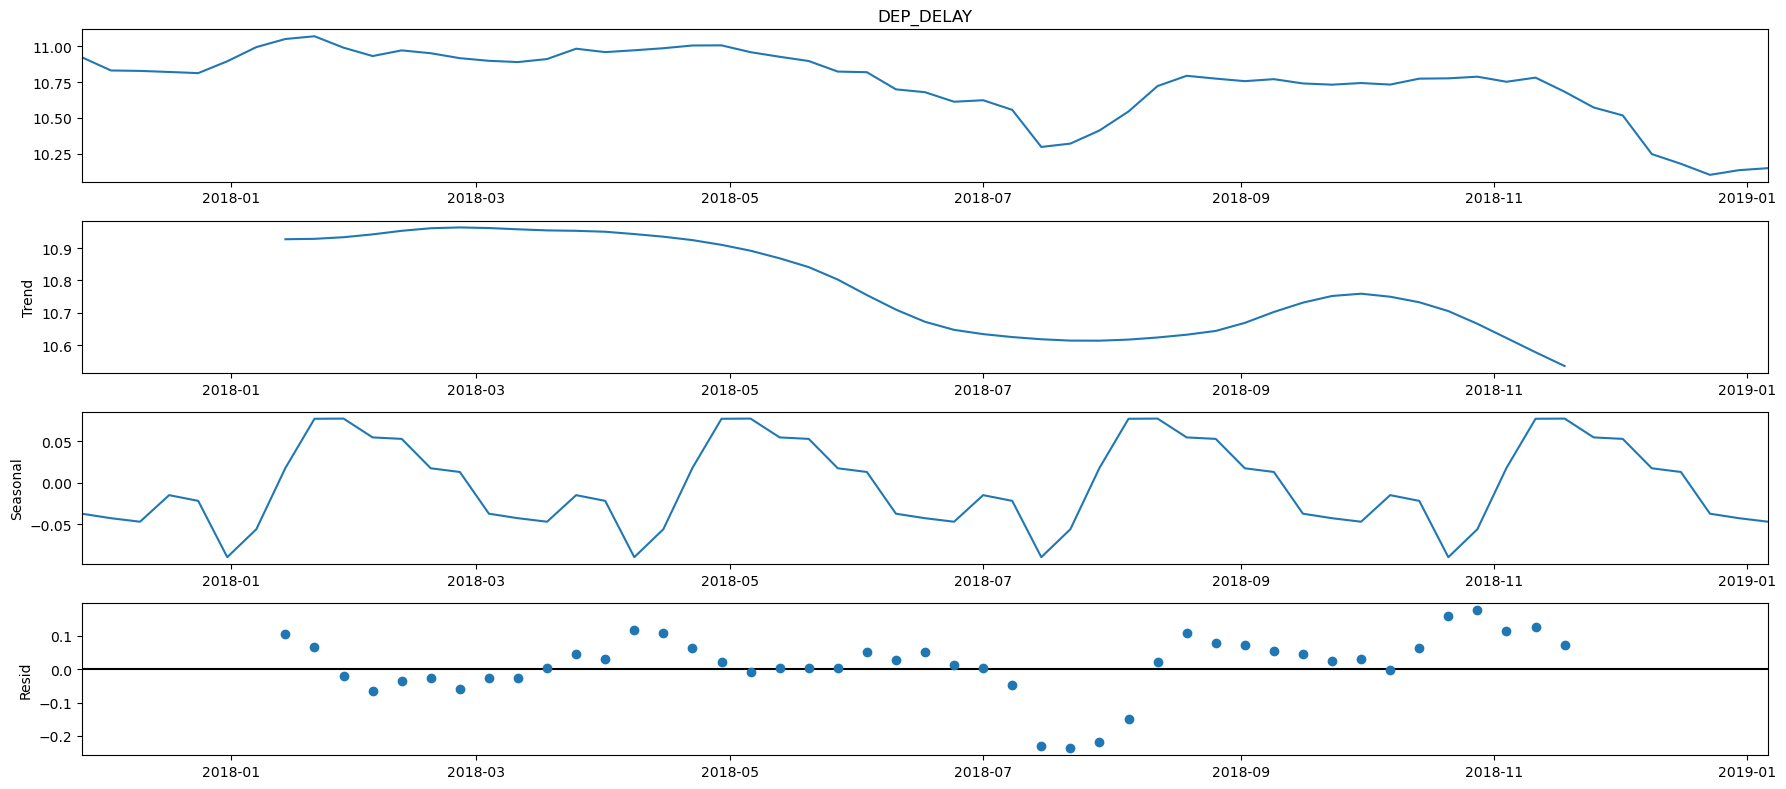

In [42]:
### SEASONAL STUDY
rcParams['figure.figsize'] = 18, 8
sig = df_delay['DEP_DELAY'].resample('W').mean()
decomposition = sm.tsa.seasonal_decompose(x = sig.rolling(100).mean().dropna(), period=14, model='additive')
fig = decomposition.plot()
plt.show()

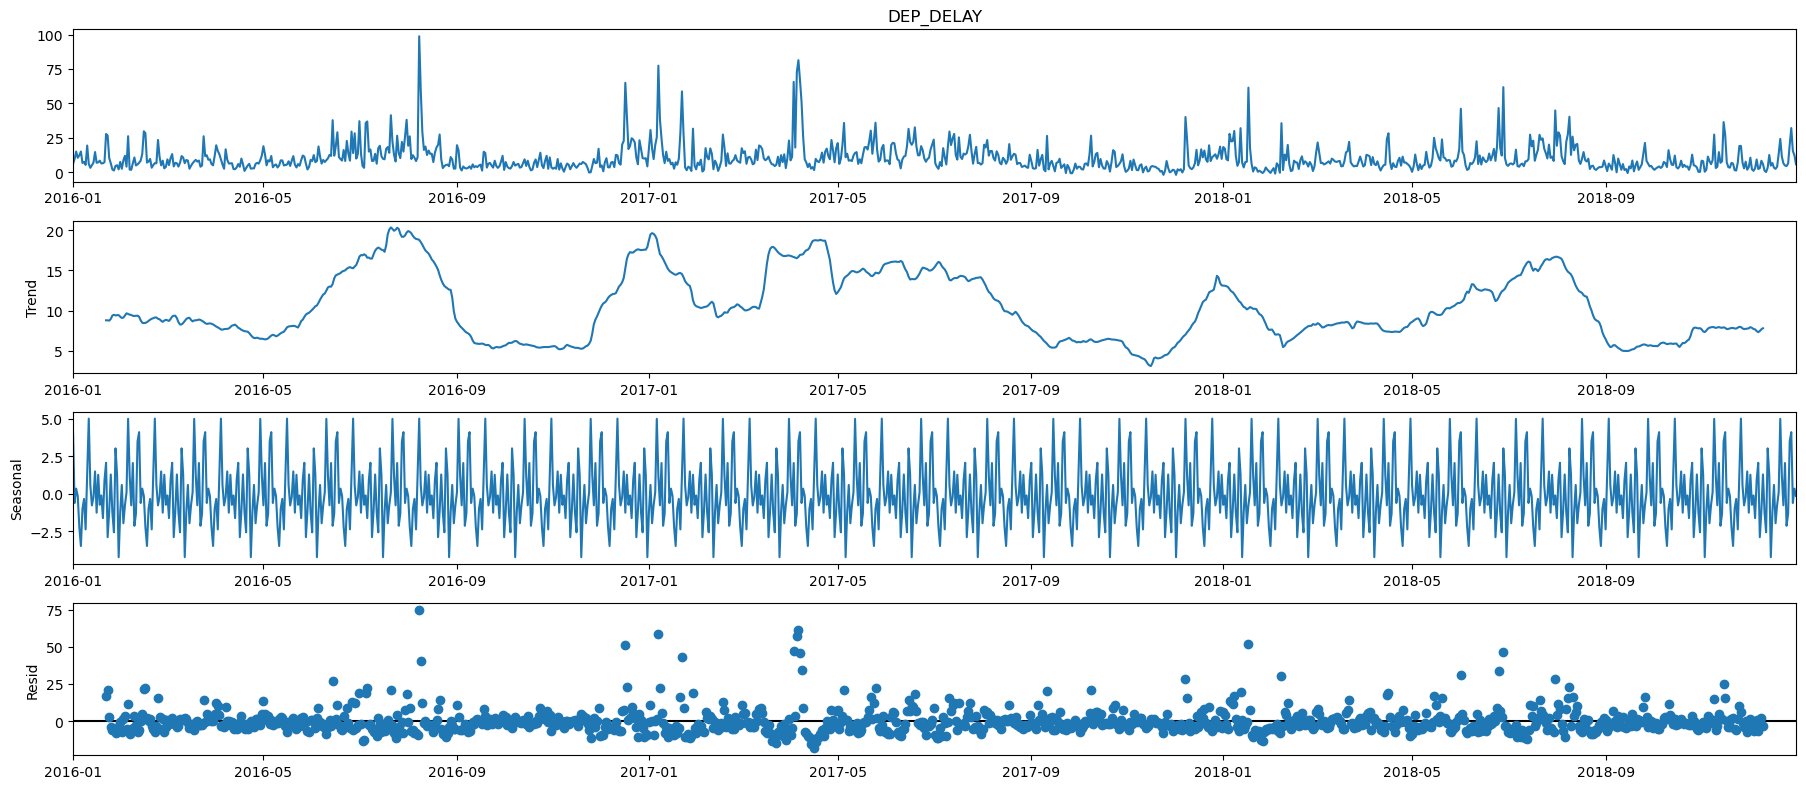

In [43]:
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(x = df_delay['DEP_DELAY'], period=42, model='additive')
fig = decomposition.plot()
plt.show()

In [ ]:
# Test if it is stationary
from statsmodels.tsa.stattools import adfuller

def adf_test(timeseries):
    print ('Results of the Dickey-Fuller Test:')

    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(df_delay[0:4], index=['Test Statistic','P-Value','Number of Lags Used','Number of Observations Used'])
    
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value

    print (dfoutput)



### Stationary Analysis

In [44]:
### Imports
# test for the null hypothesis that x is level or trend stationary.
# if p < alpha -> reject null hyp -> time series is NOT_STAT
# if p > alpha -> we cannot reject the null hyp -> we failed to demonstrate the time series is non-stat
from statsmodels.tsa.stattools import kpss

In [45]:
# With c -> The data is stationary around a constant (default)
kpss(df_all['DEP_DELAY'], regression='c', nlags = 'auto')

c:\Users\frans\anaconda3\envs\Data\lib\site-packages\statsmodels\tsa\stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


(2.5518873576739263,
 0.01,
 699,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

In [46]:
# With ct -> The data is stationary around a trend
kpss(df_all['DEP_DELAY'], regression='ct', nlags = 'auto')

c:\Users\frans\anaconda3\envs\Data\lib\site-packages\statsmodels\tsa\stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


(1.2521863587378326,
 0.01,
 699,
 {'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216})

### Autocorrelation

C:\Users\frans\AppData\Local\Temp\ipykernel_20424\311103394.py:3: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  autocorrelation_plot(df_all['DEP_DELAY'][:1500])


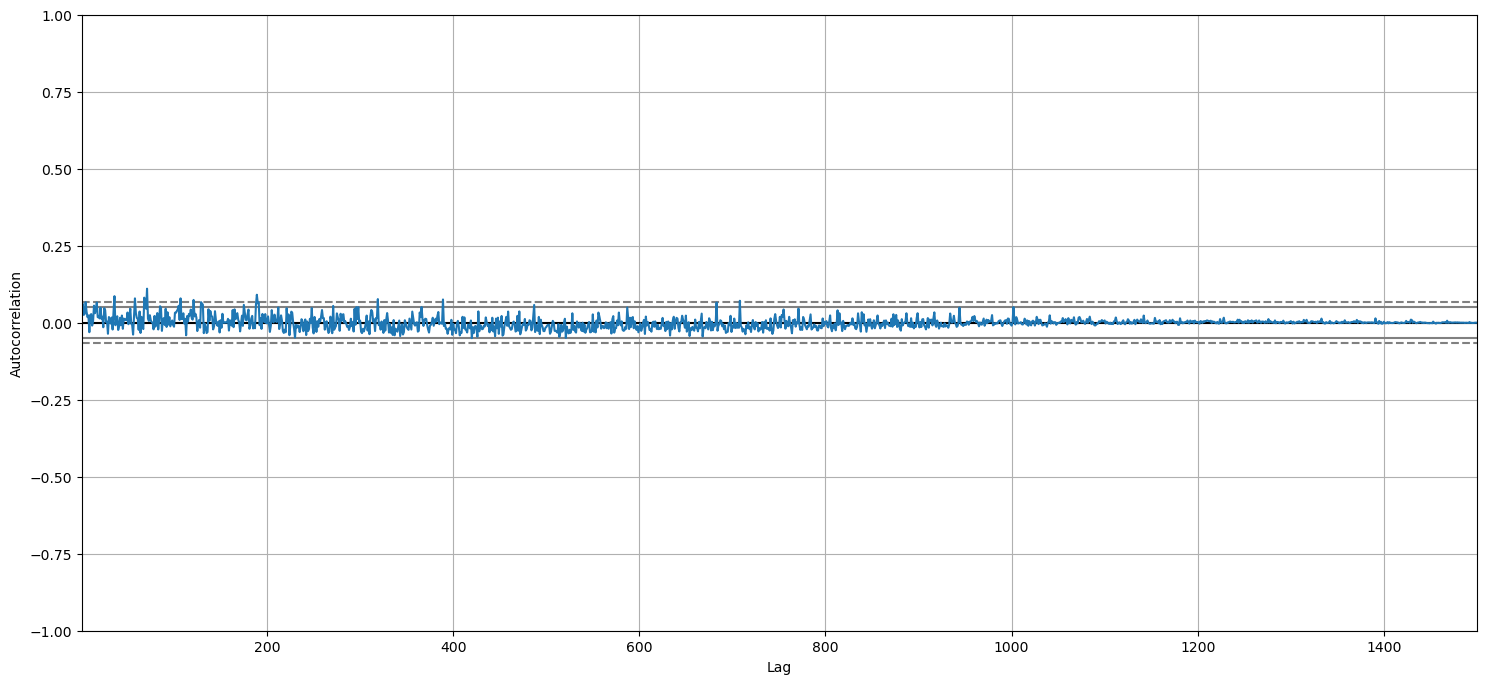

In [48]:
from pandas.plotting import autocorrelation_plot
 
autocorrelation_plot(df_all['DEP_DELAY'][:1500])
plt.show()

In [49]:
df_all['DEP_DELAY'].autocorr()

0.124290472044705

### Forcast

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
 
model = ARIMA(df_all, order=(5,1,0))
model_fit = model.fit(disp=0)

print(model_fit.summary())

# plot residual errors: residual of an observed value is 
# the difference between the observed value and the estimated value of the quantity of interest 
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [ ]:
from sklearn.metrics import mean_squared_error
 
X = df_all.values
size = int(len(X) * 0.75)   # Split percentage

train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

for t in range(len(test)):
    model = ARIMA(history, order=(0,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    y_pred = output[0]
    predictions.append(y_pred)
    y_test = test[t]
    history.append(y_test)
    print('predicted=%f, expected=%f' % (y_pred, y_test))
    
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

ValueError: SARIMAX models require univariate `endog`. Got shape (1560654, 12).